In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import networkx as nx
import MeCab
from collections import defaultdict, Counter
from copy import copy, deepcopy

In [2]:
df = pd.read_csv("pre_frequency_aozora_dinner.csv")

In [3]:
lunch_list = ["pre_frequency_kiyoda_lunch.csv",
              "pre_frequency_sawada_lunch.csv",
              "pre_frequency_sushiichi_lunch.csv",
              "pre_frequency_sushitsuu_lunch.csv",
              "pre_frequency_imamura_lunch.csv",
              "pre_frequency_mitani_lunch.csv",
              "pre_frequency_hatsune_lunch.csv",
              "pre_frequency_matsukan_lunch.csv",
             ]

In [4]:
dinner_list = ["pre_frequency_kiyoda_dinner.csv",
              "pre_frequency_sawada_dinner.csv",
              "pre_frequency_sushiichi_dinner.csv",
              "pre_frequency_sushitsuu_dinner.csv",
              "pre_frequency_imamura_dinner.csv",
              "pre_frequency_mitani_dinner.csv",
              "pre_frequency_hatsune_dinner.csv",
              "pre_frequency_matsukan_dinner.csv",
              "pre_frequency_aozora_dinner.csv",
              ]

In [5]:
a = "pre_frequency_aozora_dinner.csv"

In [6]:
a = a.replace("pre_frequency_", "")
a = a.replace(".csv","")
a

'aozora_dinner'

In [11]:
def draw_network(file):
    df = pd.read_csv(file)
    file = file.replace("pre_frequency_", "")
    file = file.replace(".csv","")
    node_name = defaultdict(str)
    node_idx = defaultdict(int)
    node_type = defaultdict(list)
    node_count = defaultdict(int)
    edge_list = []
    #rcParams['font.family'] = 'sans-serif'
    #rcParams["font.serif"] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']
    #matplotlib.rcParams["font.family"] = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"
    #fp = FontProperties("/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc")
    np.random.seed(1234)

    %matplotlib inline

    cnt = 0
    w_type = "主"
    s = 0
    for w in list(df.columns):
        if w not in node_name.values():
            node_name[cnt] = w
            node_idx[w] = cnt
            node_count[cnt] = 60 - s
            node_type[w_type].append(node_idx[w])
            cnt += 1
        else:
            node_count[node_idx[w]] += 1
        s += 3
    for name in list(df.columns):
        w_type = "脇"
        w_list = df[name]
        t = 100
        s = 0
        for w in w_list:
            if w not in node_name.values():
                node_name[cnt] = w
                node_idx[w] = cnt
                node_count[cnt] = 30 - s
                node_type[w_type].append(node_idx[w])
                cnt += 1
            else:
                node_count[node_idx[w]] += 1
            s += 3
            edge = (min(node_idx[w], node_idx[name]), max(node_idx[w], node_idx[name]))
            edge_list.append(edge)
            for i in range(t):
                edge_list.append(edge)
            t -= 8
    edge_count = Counter(edge_list)
    G = nx.Graph()
    G.add_nodes_from([(idx, {"cnt":node_count[idx]}) for idx in node_name])
    G.add_edges_from([(a, b, {'cnt': edge_count[(a, b)]}) for a, b in edge_list])
    G2 = deepcopy(G)
    for n, attr in G.nodes().items():
        if (attr['cnt'] < 10):
            G2.remove_edges_from(list(G.edges(n)))
            G2.remove_node(n)
            
    G3 = deepcopy(G2)
    for e, attr in G2.edges().items():
        if attr['cnt'] < 0:
            G3.remove_edge(e)
            
    G4 = deepcopy(G3)
            
    G_result = deepcopy(G2)
    pos = nx.layout.spring_layout(G_result, k=0.7, seed=10)
    labels = {n: node_name[n] for n in pos.keys()}
    node_size = [node_count[n]*50 for n in pos.keys()]
    edge_alpha = [edge_count[e] for e in G_result.edges()]
    edge_colors = [edge_count[e] for e in G_result.edges()]
    edge_width = [edge_count[e]/25 + 2 for e in G_result.edges()]
    fig, ax = plt.subplots(figsize=(12,12))
    
    for i in range(10):
        node_size.pop(0)
    nx.draw_networkx_nodes(G_result, pos, nodelist=[n for n in G_result.nodes() if (n not in node_type["主"])],
                          node_size=node_size, node_color="yellowgreen", alpha=0.8, ax=ax)
    node_size = [node_count[n]*50 for n in pos.keys()]
    
    nx.draw_networkx_nodes(G_result, pos, nodelist=[n for n in G_result.nodes() if (n in node_type["主"] and n not in node_type["脇"] )],
                          node_size=node_size, node_color="red", alpha=0.8, ax=ax, font_size=10)
    nx.draw_networkx_edges(G_result, pos, alpha=0.2, width = edge_width,
                           edge_vmin=0, edge_vmax=10, edge_color="gray",
                          edge_cmap=plt.cm.Blues,ax=ax)
    #fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"
    #fpath = "IPAPGothic"
    #fpath = "Osaka"
    font_prop = FontProperties(fname=r'/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc')
    text_items = nx.draw_networkx_labels(G_result, pos, labels, font_size=16, ax=ax)
    for t in text_items.values():
        t.set_fontproperties(font_prop)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.xlabel(file)
    plt.savefig("pre_network_" + file +"_.png")
    plt.show(block=False)

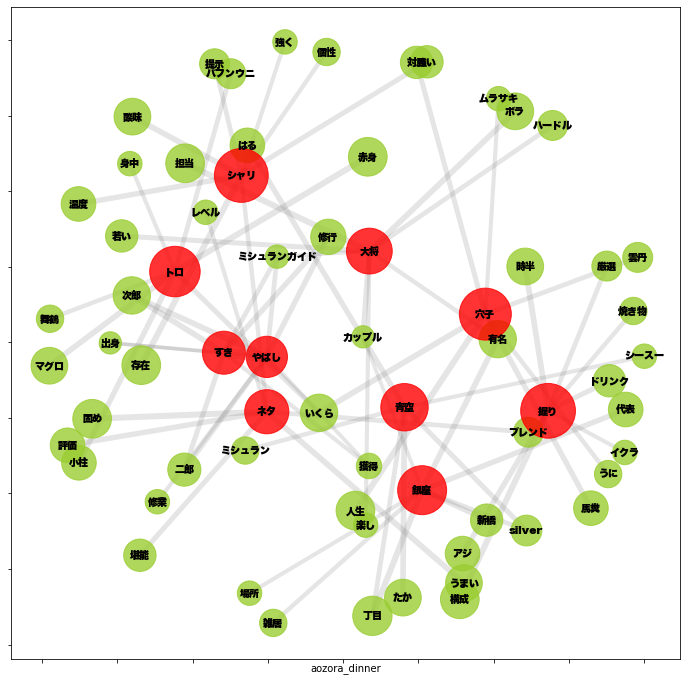

In [12]:
draw_network("pre_frequency_aozora_dinner.csv")

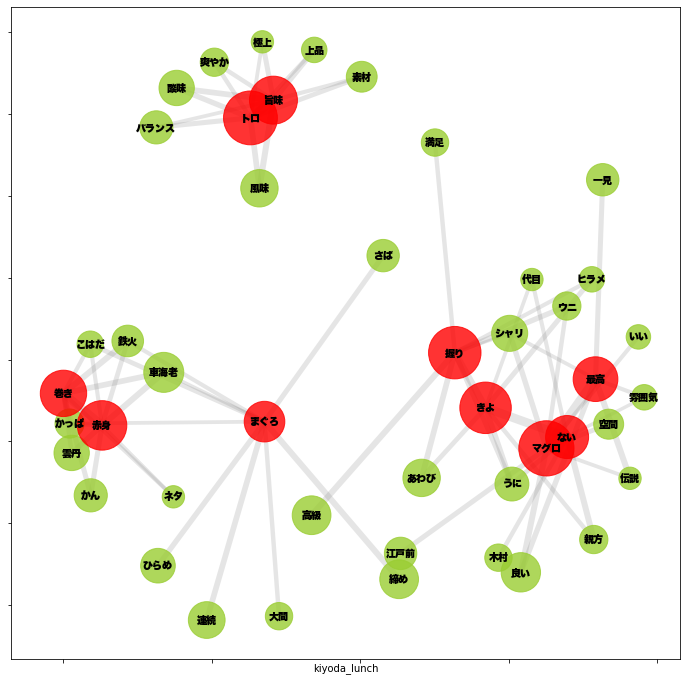

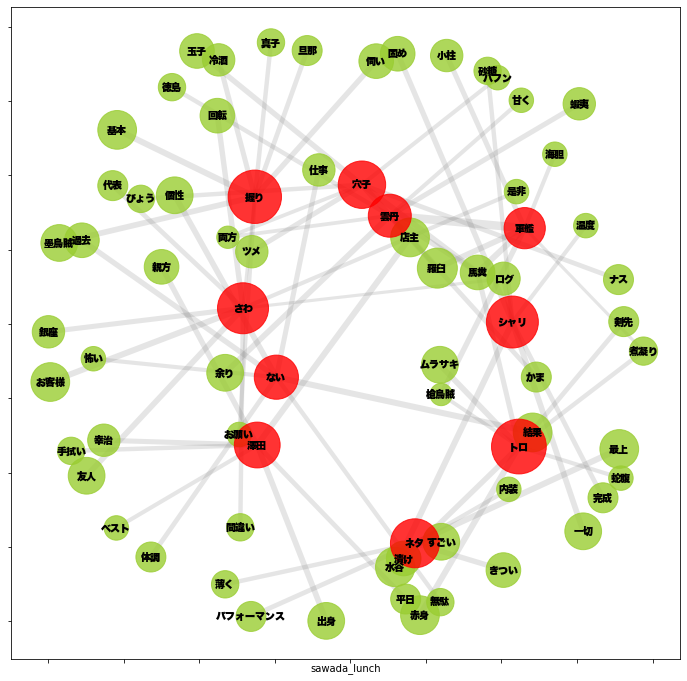

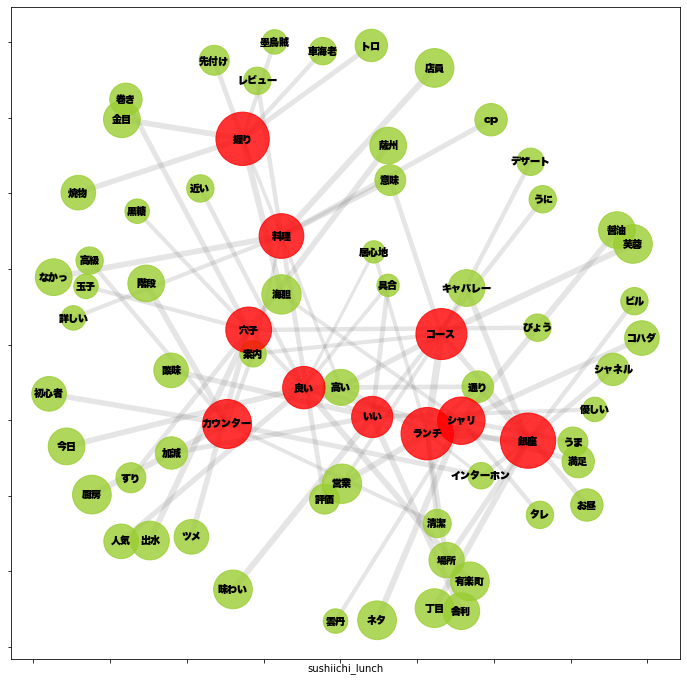

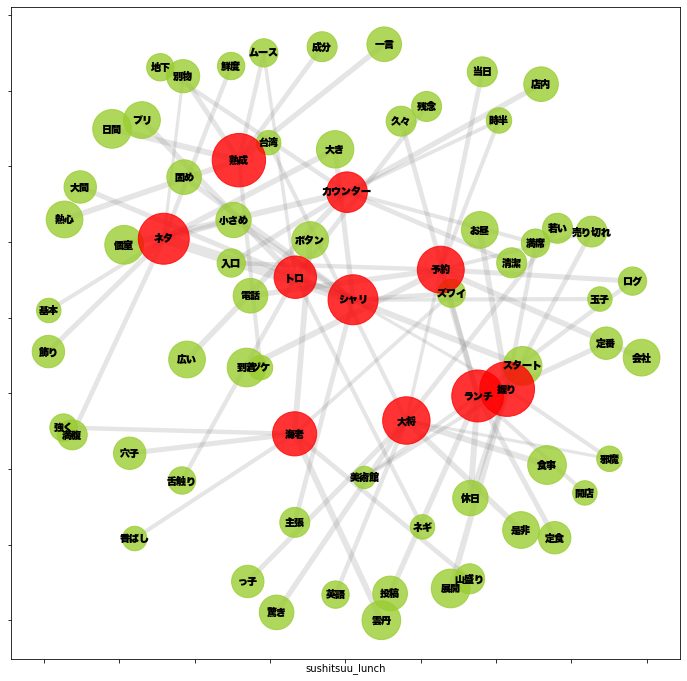

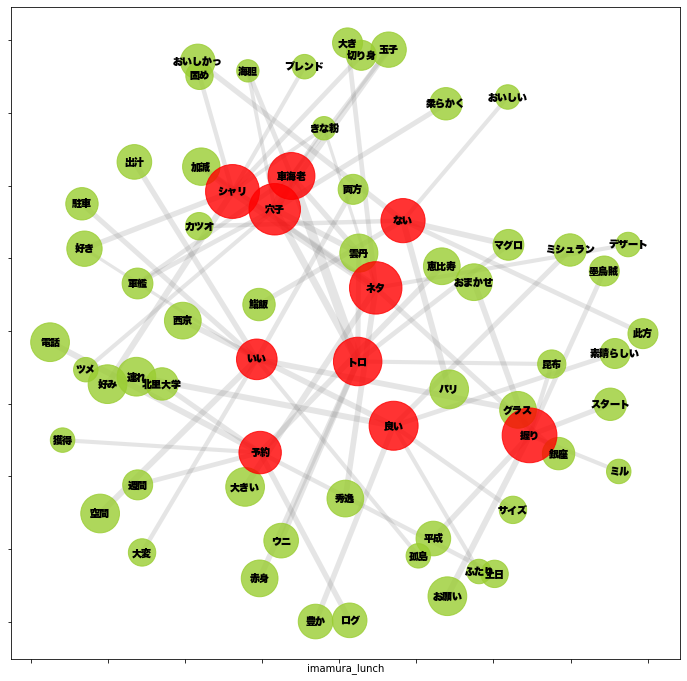

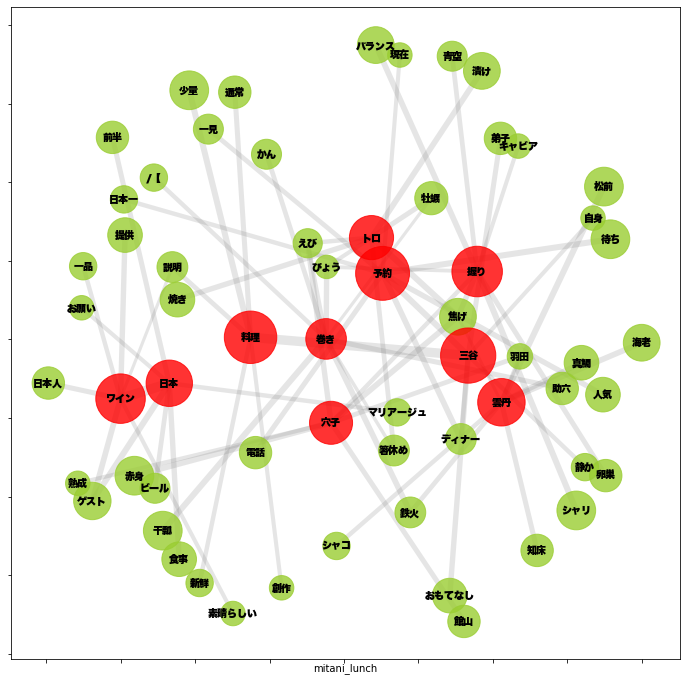

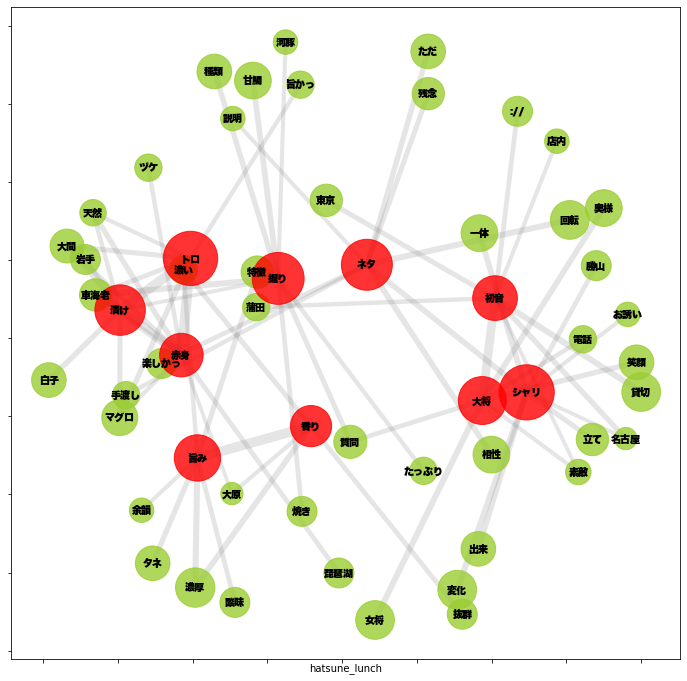

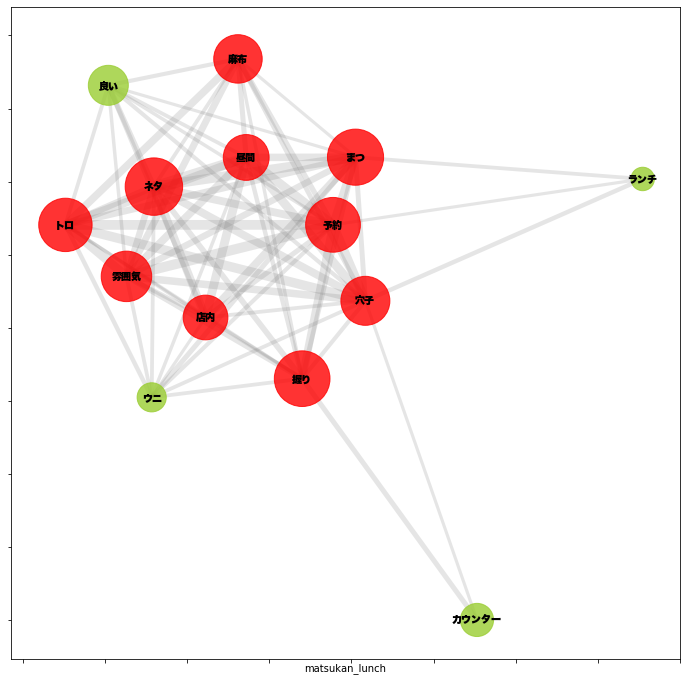

In [13]:
for file in lunch_list:
    draw_network(file)

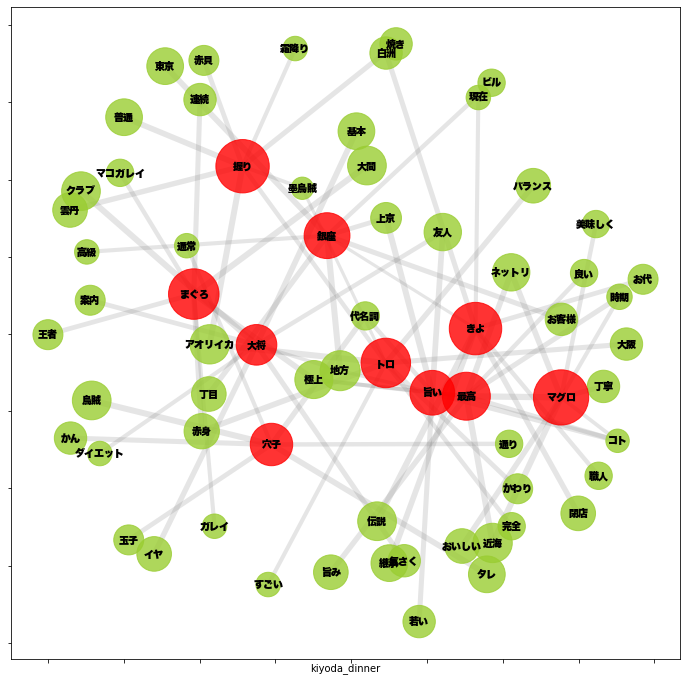

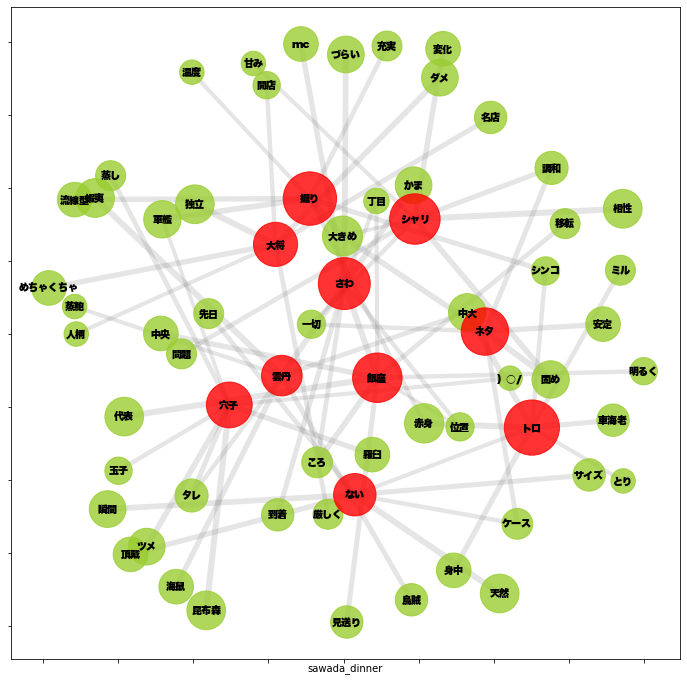

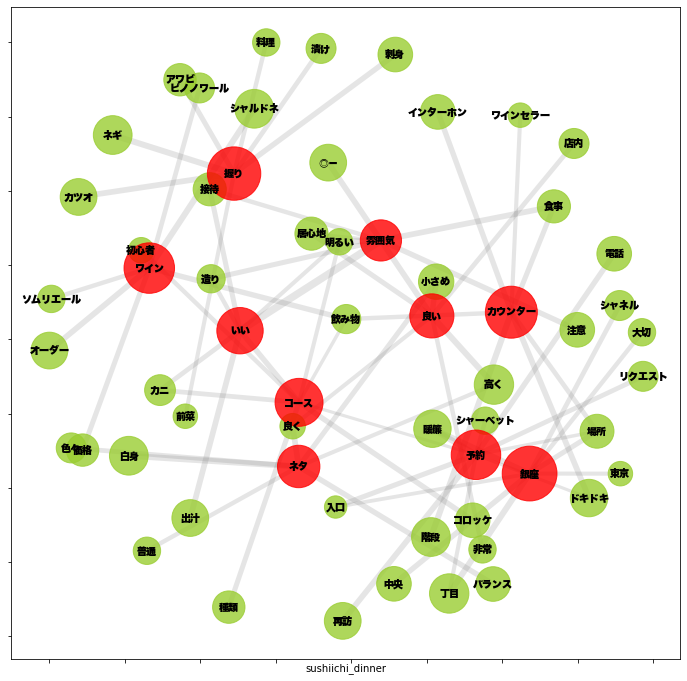

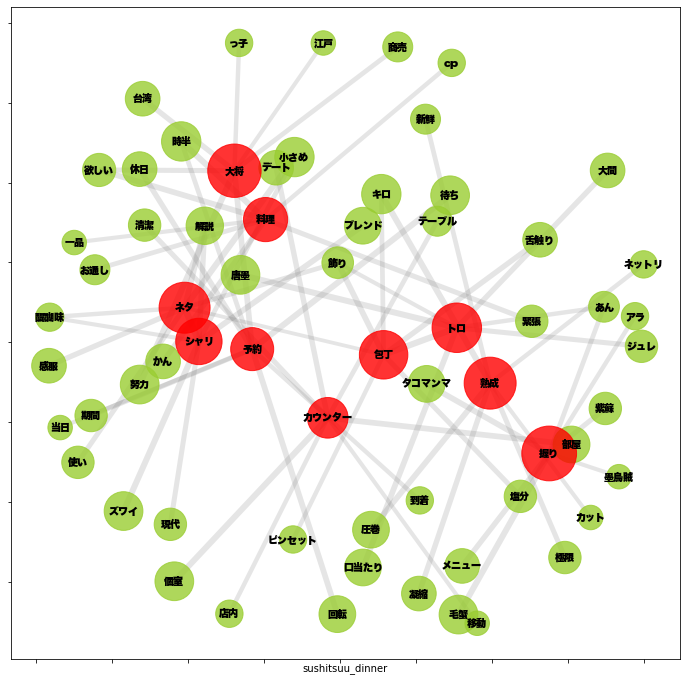

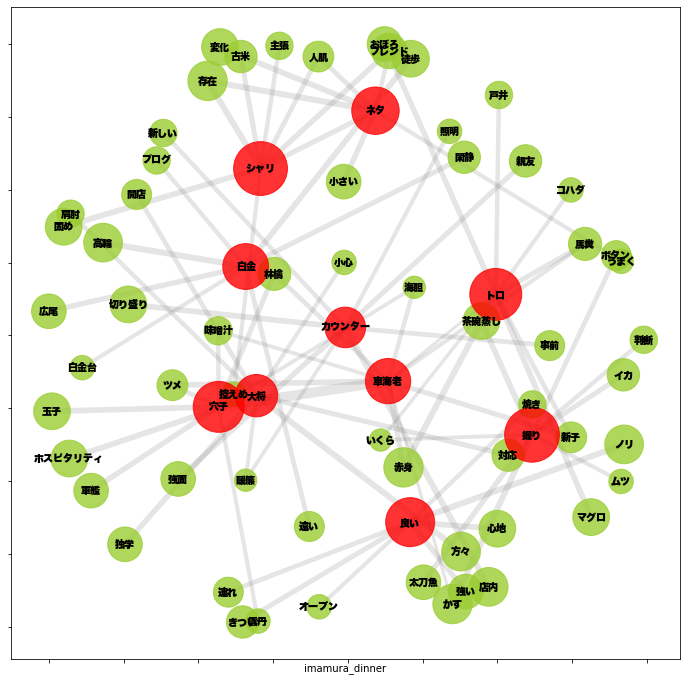

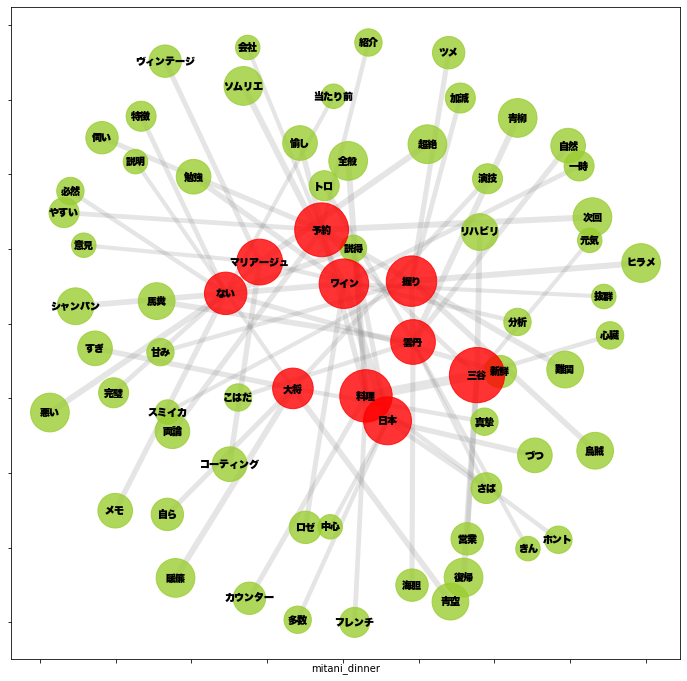

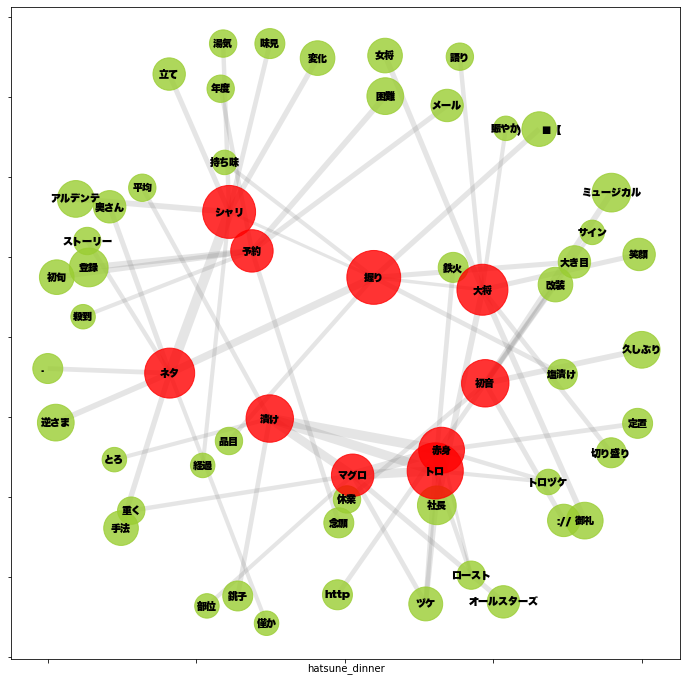

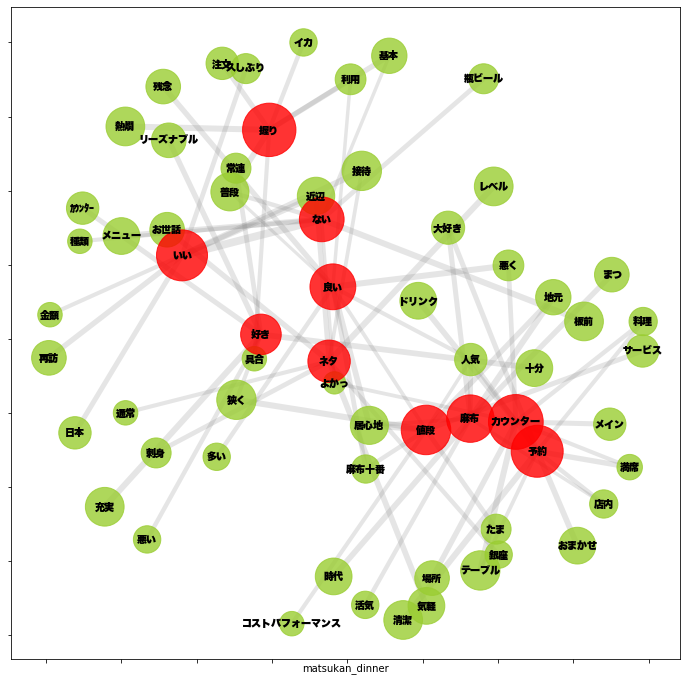

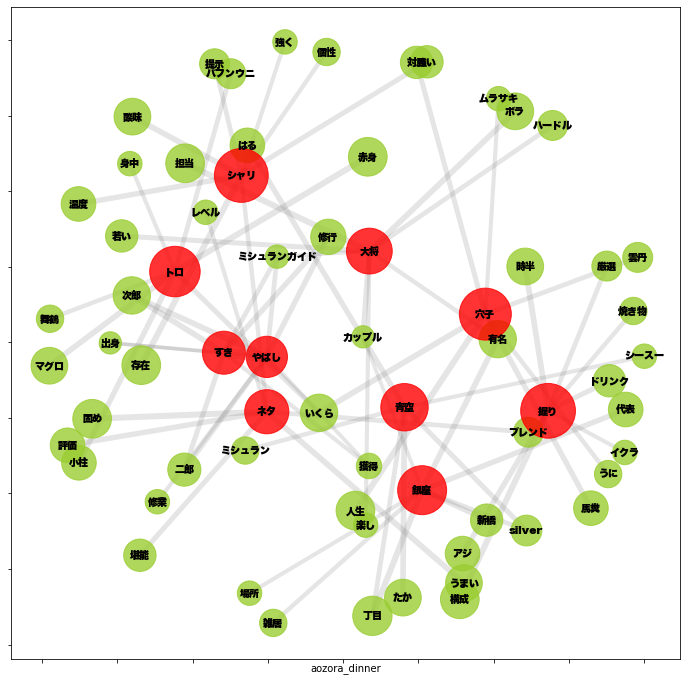

In [14]:
for file in dinner_list:
    draw_network(file)